In [1]:
import pandas as pd

In [2]:
import glob

filenames = glob.glob("data/*")
filenames[:5]

['data/2002.txt',
 'data/2016.txt',
 'data/2017.txt',
 'data/2003.txt',
 'data/2015.txt']

In [ ]:
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/upshot-trump-emolex/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt -P data

In [3]:
speeches = [open(filename).read() for filename in filenames]
len(speeches)

26

In [4]:
speeches_df = pd.DataFrame({
    'text': speeches,
    'filename': filenames
})
speeches_df.head(3)

,text,filename
0,"As I look back over these past twelve months, ...",data/2002.txt
1,There was a time when British Olympic medal wi...,data/2016.txt
2,"Sixty years ago today, I spoke about the speed...",data/2017.txt


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
matrix = vec.fit_transform(speeches_df['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/Users/felixm/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,100th,11,13,14,147,1604,1914,1916,1944,...,yesteryear,yet,you,young,younger,your,yourself,youth,zealand,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,2,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,2,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,6,2,0,2,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0


In [6]:
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(speeches_df.text)
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/Users/felixm/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
angry_words = emolex_df[emolex_df.anger == 1]['word']
trust_words = emolex_df[emolex_df.trust == 1]['word']
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']
disgust_words = emolex_df[emolex_df.disgust == 1]['word']
fear_words = emolex_df[emolex_df.fear == 1]['word']
joy_words = emolex_df[emolex_df.joy == 1]['word']
negative_words = emolex_df[emolex_df.negative == 1]['word']
positive_words = emolex_df[emolex_df.positive == 1]['word']
sadness_words = emolex_df[emolex_df.sadness == 1]['word']
surprise_words = emolex_df[emolex_df.surprise == 1]['word']


In [9]:
speeches_df['anger'] = wordcount_df[angry_words].sum(axis=1)
speeches_df.head(3)

,text,filename,anger
0,"As I look back over these past twelve months, ...",data/2002.txt,0.050000
1,There was a time when British Olympic medal wi...,data/2016.txt,0.013514
2,"Sixty years ago today, I spoke about the speed...",data/2017.txt,0.071429


In [10]:
speeches_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
speeches_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
speeches_df['fear'] = wordcount_df[fear_words].sum(axis=1)
speeches_df['joy'] = wordcount_df[joy_words].sum(axis=1)
speeches_df['negative'] = wordcount_df[negative_words].sum(axis=1)
speeches_df['positive'] = wordcount_df[positive_words].sum(axis=1)
speeches_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
speeches_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
speeches_df['trust'] = wordcount_df[trust_words].sum(axis=1)

In [11]:
def name_edit(filename):
    return filename[5:9]

In [12]:
speeches_df['year'] = speeches_df['filename']
speeches_df['year'] = speeches_df['year'].map(lambda x:name_edit(x))

In [13]:
speeches_df['year'] = speeches_df['year'].astype(float)

In [14]:
speeches_df = speeches_df.sort_values(by='year')

In [15]:
speeches_df.head()

,text,filename,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,year
18,At the Christian heart of this United Kingdom ...,data/1997.txt,0.032609,0.152174,0.038043,0.081522,0.190217,0.114130,0.364130,0.081522,0.059783,0.201087,1997.0
17,Christmas is a time for reflection and renewal...,data/1998.txt,0.019417,0.174757,0.009709,0.048544,0.145631,0.116505,0.334951,0.067961,0.063107,0.184466,1998.0
16,A very Happy Christmas to you all. Listening t...,data/1999.txt,0.017143,0.114286,0.000000,0.068571,0.080000,0.062857,0.262857,0.034286,0.028571,0.142857,1999.0
6,By any measure this Millennium year has been a...,data/2000.txt,0.066667,0.180000,0.060000,0.100000,0.200000,0.093333,0.360000,0.040000,0.060000,0.260000,2000.0
5,"For many people all over the world, the year 2...",data/2001.txt,0.116438,0.205479,0.075342,0.130137,0.198630,0.205479,0.383562,0.136986,0.089041,0.260274,2001.0


In [16]:
import seaborn as sns
import matplotlib as plt

/var/folders/0w/5y46796n39ld7nh2vj4h3bkm0000gn/T/ipykernel_77817/2142074749.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.lineplot(data=speeches_df, x='filename', y='anger').set_xticklabels(


<AxesSubplot:xlabel='filename', ylabel='anger'>

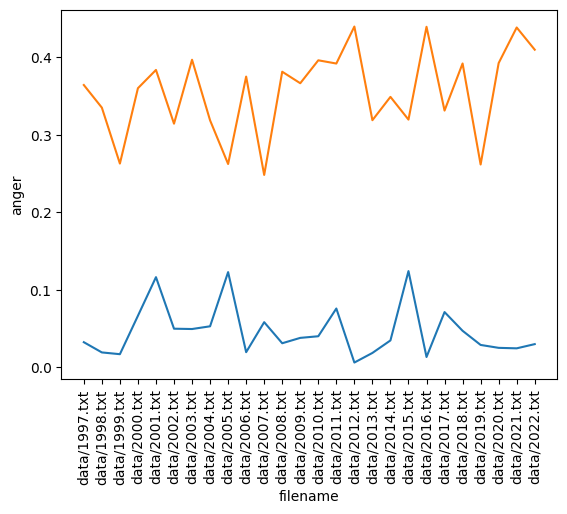

In [17]:
sns.lineplot(data=speeches_df, x='filename', y='anger').set_xticklabels(
    labels=speeches_df['filename'], rotation=90)
sns.lineplot(data=speeches_df, x='filename', y='positive')


In [18]:
df = speeches_df[['year','anger', 'anticipation','disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust' ]]



In [19]:
df = df.set_index('year')

In [ ]:
# import matplotlib.pyplot as plt
# sns.lineplot(data=df.column1, color="g")
# ax2 = plt.twinx()
# sns.lineplot(data=df.column2, color="b", ax=ax2)

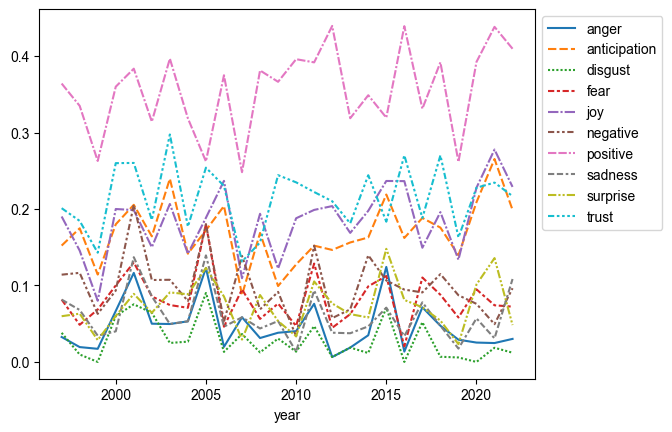

In [20]:
ax = sns.lineplot(data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.set(rc={'figure.figsize':(20,8)})

In [22]:
speeches_df.to_csv('sentiment.csv',index=False)